In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May  4 14:52:46 2023

@author: ear-field
"""

# Clear all the variables
get_ipython().run_line_magic('reset', '-sf')

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# import packages
import os
import pandas as pd
import random
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# import custom functions
from assemblage import database
from acoustic_index import compute_all_indices, plot_indices, index_plot

In [2]:
# define the random seed
random.seed(2024)
# Flag to create the database
CREATE_DATABASE = False
# Flag to compute the indices
COMPUTE_INDICES = False
# Flag to plot the indices
PLOT_INDICES = True
# define the path to the sound files
SOUND_DIR = Path('../Evascape_soundfiles')
# define the path to the database
DATABASE_DIR = Path("../Evascape_reconstructed_soundscapes/Database_20240606_Desync")   
# define the name of the csv that defines the database
DATABASE_FILENAME = 'database_data.csv'   
# define the name of the csv that contains the index values
INDICE_FILENAME = 'index_13dB.csv'
# list of indices to plot
INDICES_LIST = ['nROI','aROI','ACI','H', 'NDSI', 'ADI', 'BI']
# define the minimum distance between the bird and the microphone (in meters)
D_MIN = 10
# define the maximum distance between the bird and the microphone (in meters)
D_MAX = 80

# define the list of richness to simulate
# => number of species per soundscape
# => the maximal richness is defined by the number of species (SPECIES_LIST) in the database
RICHNESS_LIST = [1]

# define the list of abundance levels to simulate
# => number of indivuals per species per soundscape
ABUNDANCE_LIST = [1,2,3,4,5]

# define the list of bird species that could be present in the soundscape
# => list of existing species in the database : erirub, fricoe, perate, phycol, regreg, sylatr, turmer, turphi
SPECIES_LIST = ["erirub", "fricoe", "perate","phycol", "regreg", "sylatr", "turmer", "turphi"]

# define the list of background sound used to simulate the soundscape
# => list of existing background sound in the database : no_background, ambient_sound, rain_pw01, rain_pw02, rain_pw03, wind_pw01, wind_pw02, wind_pw03, aircraft_pw01, aircraft_pw02, tettigonia_veridissima
BACKGROUND_LIST = [
            'no_background','ambient_sound', 'rain_pw01',  
            'rain_pw02','rain_pw03','wind_pw01', 
            'wind_pw02','wind_pw03', 'aircraft_pw01',
            'aircraft_pw02', 'tettigonia_veridissima'
                ]

# define if an impulse response is used to simulate the soundscape (i.e add a reverb effect)
IMPULSE_RESPONSE = None
# define if the bird behavior is random or not
RANDOM_BEHAVIOUR = False
# Define the number of samples (soundscapes) per condition (richness, abundance, background)
SAMPLE_SIZE = 28 # 20
# define the duration of the final soundscape (in seconds)
# => the maximal duration of the soundscapes is defined by the duration of the background sound which is 60s
DURATION = 60
# define the sampling rate (in Hz)
SAMPLING_RATE = 44100

In [3]:
if CREATE_DATABASE:
    # load sound dataframes
    df_bird_channel = pd.read_csv(SOUND_DIR / 'bird_channel.csv', sep=';', index_col = 0)
    df_background_channel = pd.read_csv(SOUND_DIR / 'background_channel.csv', sep=';', index_col = 0)

    # Create the database      
    database_df = database(
                        df_bird_channel, 
                        df_background_channel, 
                        database_label  = 'Evascape',
                        save_dir        =DATABASE_DIR,
                        d_min           =D_MIN, 
                        d_max           =D_MAX,
                        richness_list   =RICHNESS_LIST, 
                        abundance_lvls  =ABUNDANCE_LIST,  
                        channel1_list   =SPECIES_LIST,
                        channel2_list   =BACKGROUND_LIST,
                        impulse_response=IMPULSE_RESPONSE, 
                        random_behavior =RANDOM_BEHAVIOUR, 
                        index_test      =True,
                        anonymous_ID    =False,
                        all_combinations=False,
                        sample_size     =SAMPLE_SIZE, 
                        duration        =DURATION, 
                        samprate        =SAMPLING_RATE)
    
    # Save database
    database_df.to_csv(DATABASE_DIR / DATABASE_FILENAME, sep=';')
else:
    # Load the database
    database_df = pd.read_csv(DATABASE_DIR / DATABASE_FILENAME, sep=';')

In [4]:
# INDEX calculation 
if COMPUTE_INDICES :
    # test if database_df is already loaded
    try :
        if 'database_df' not in locals():
            database_df = pd.read_csv(DATABASE_DIR / DATABASE_FILENAME, sep=';', index_col = 0)
    except :
        print('Database not loaded. The database file is missing or the path is incorrect')

    #Indice calcultation
    index_df = compute_all_indices(database_df, root_dir="../Evascape_reconstructed_soundscapes")
    index_df.to_csv(DATABASE_DIR / INDICE_FILENAME, sep=';')

Calcul des spearman sans moyennage mais par condition avec l'ensemble des points pour chaque GT et channel 2

----- nROI richness -----
0.79*
0.78*
0.56*
0.44*
0.42*
0.80*
0.78*
0.76*
0.78*
0.82*
0.82*
----- nROI abundance -----
0.55*
0.54*
0.36*
0.22
0.11
0.55*
0.51*
0.53*
0.49*
0.59*
0.53*
----- aROI richness -----
0.70*
0.69*
0.48*
0.38*
0.38*
0.68*
0.65*
0.67*
0.65*
0.70*
0.72*
----- aROI abundance -----
0.58*
0.41*
0.32*
0.18
0.10
0.42*
0.43*
0.46*
0.45*
0.47*
0.42*
----- ACI richness -----
-0.11
0.62*
0.28*
0.09
0.07
0.63*
0.59*
0.63*
0.61*
0.62*
0.65*
----- ACI abundance -----
-0.15
0.27*
0.06
0.03
-0.00
0.38*
0.40*
0.44*
0.43*
0.43*
0.30*
----- H richness -----
0.44*
-0.30*
0.07
0.07
0.07
-0.11
0.19
0.24*
0.12
0.05
-0.29*
----- H abundance -----
0.48*
-0.05
0.00
0.02
0.05
0.05
-0.06
0.02
0.09
0.01
-0.07
----- NDSI richness -----
-0.04
0.54*
0.38*
0.16
0.25*
0.52*
0.53*
0.62*
0.30*
0.28*
0.28*
----- NDSI abundance -----
0.18
0.26*
0.17
0.15
0.12
0.23
0.15
0.23
0.18
0.09
-0.08
----- ADI richness -----
0.38*
0.64*
0.04
-0.01
-0.00
0.62*
0.59*
0.61*
0.55*
0.53*
0.56*
----- ADI abundance --

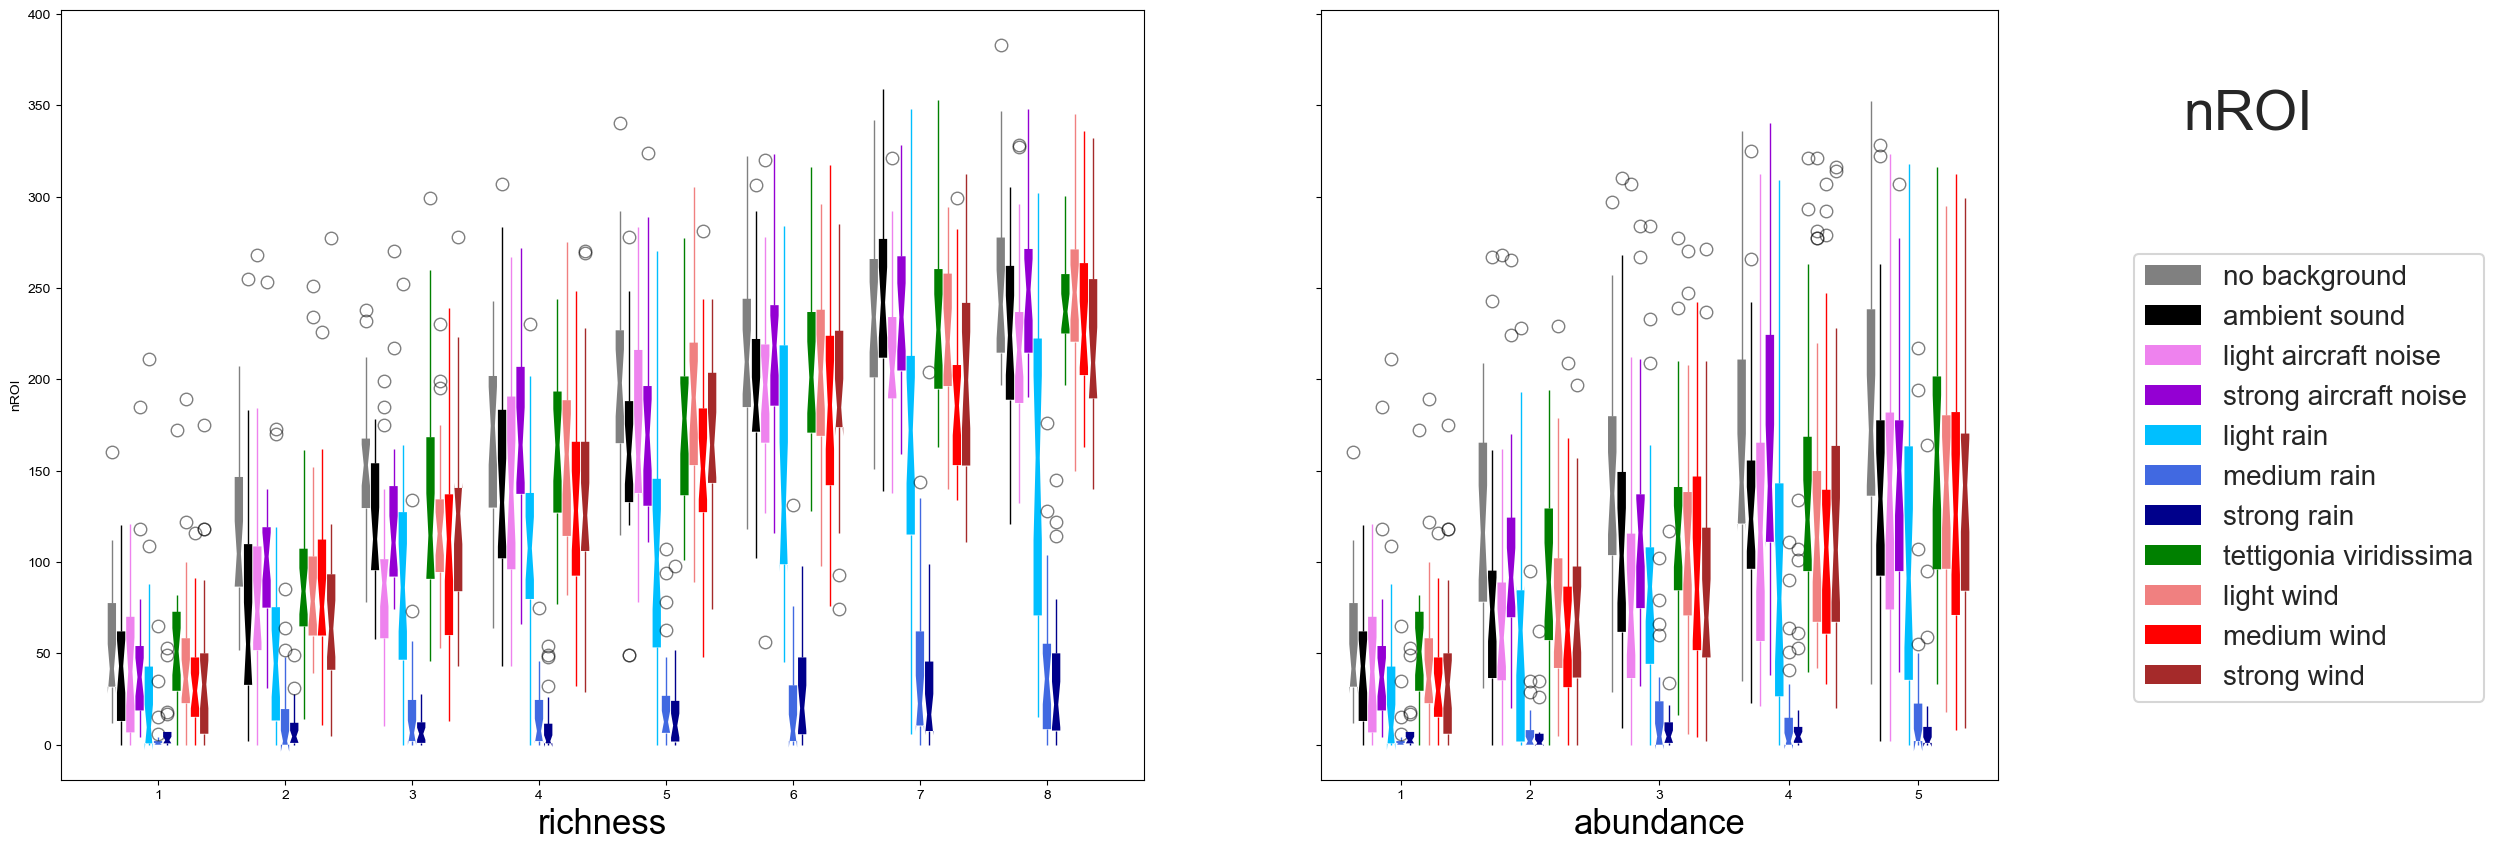

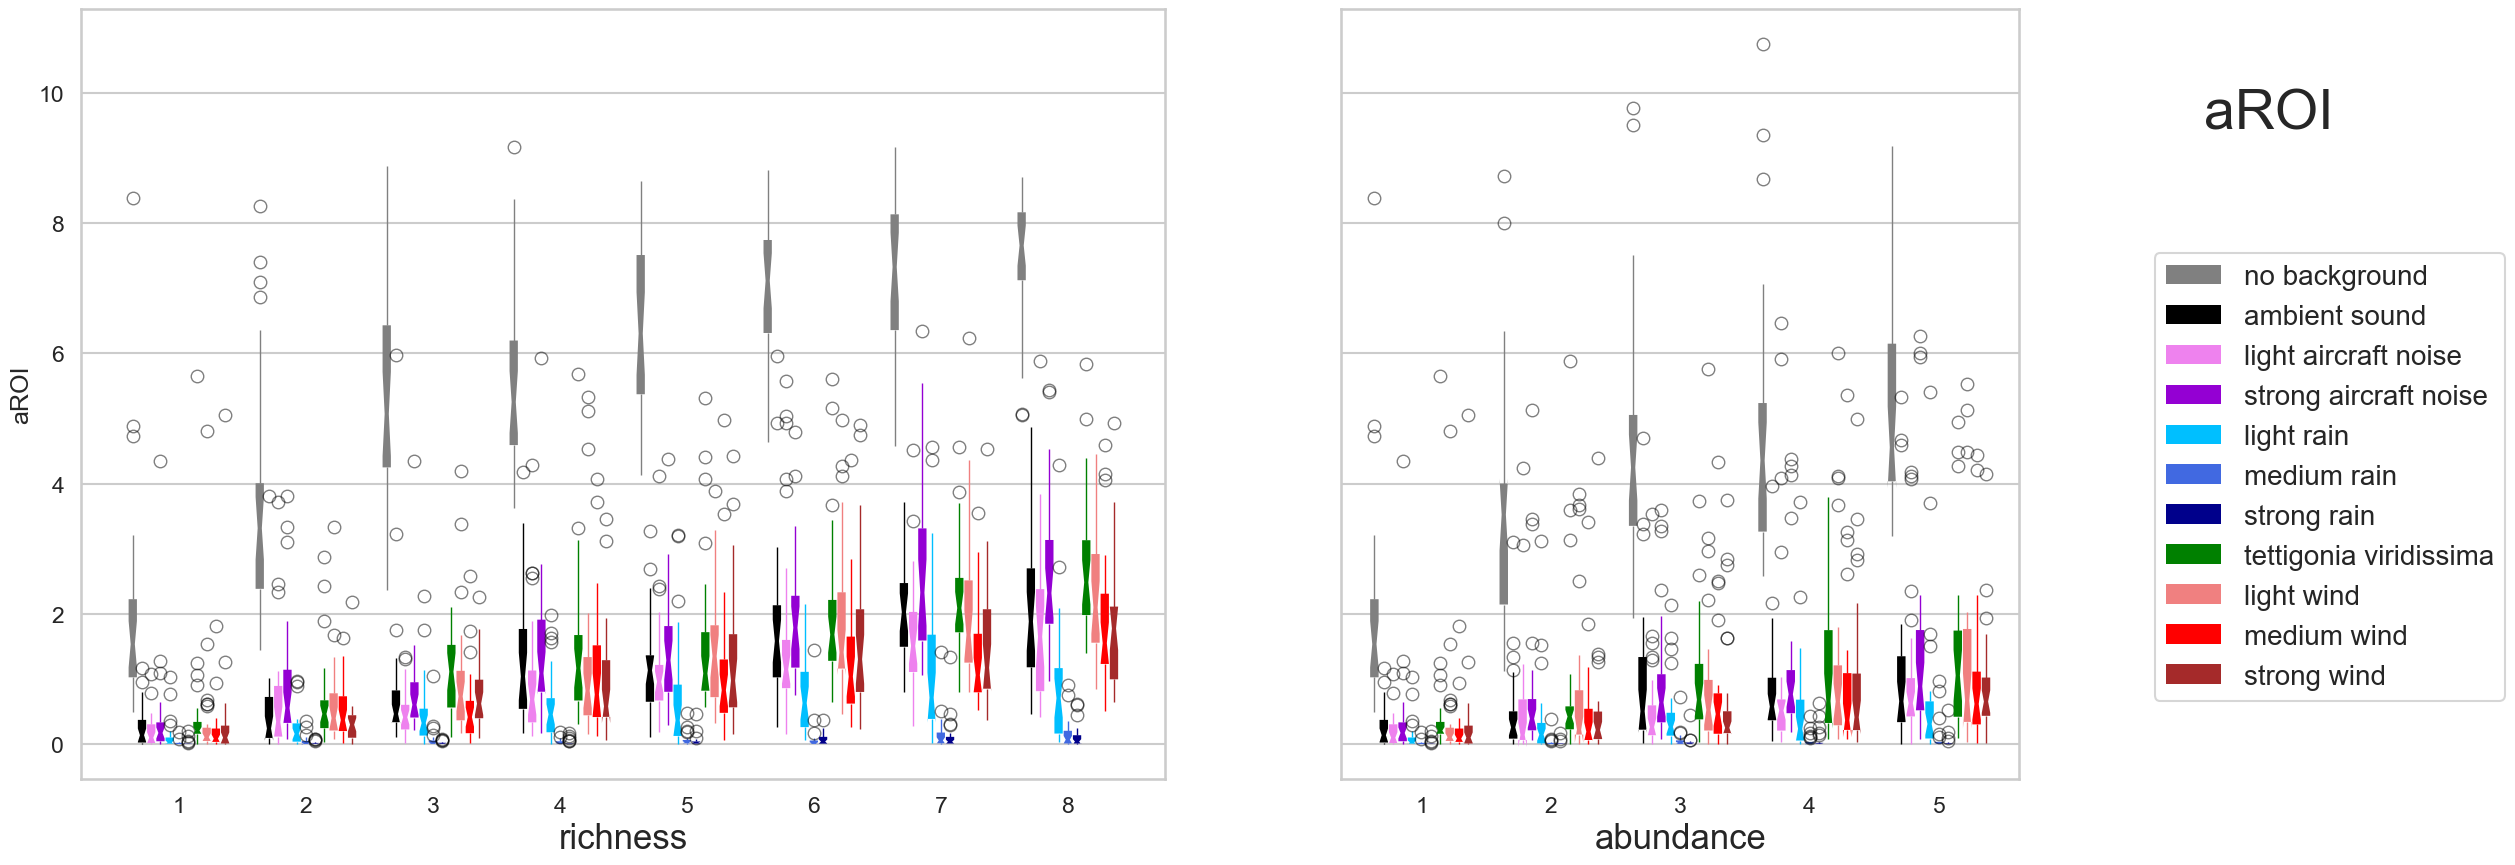

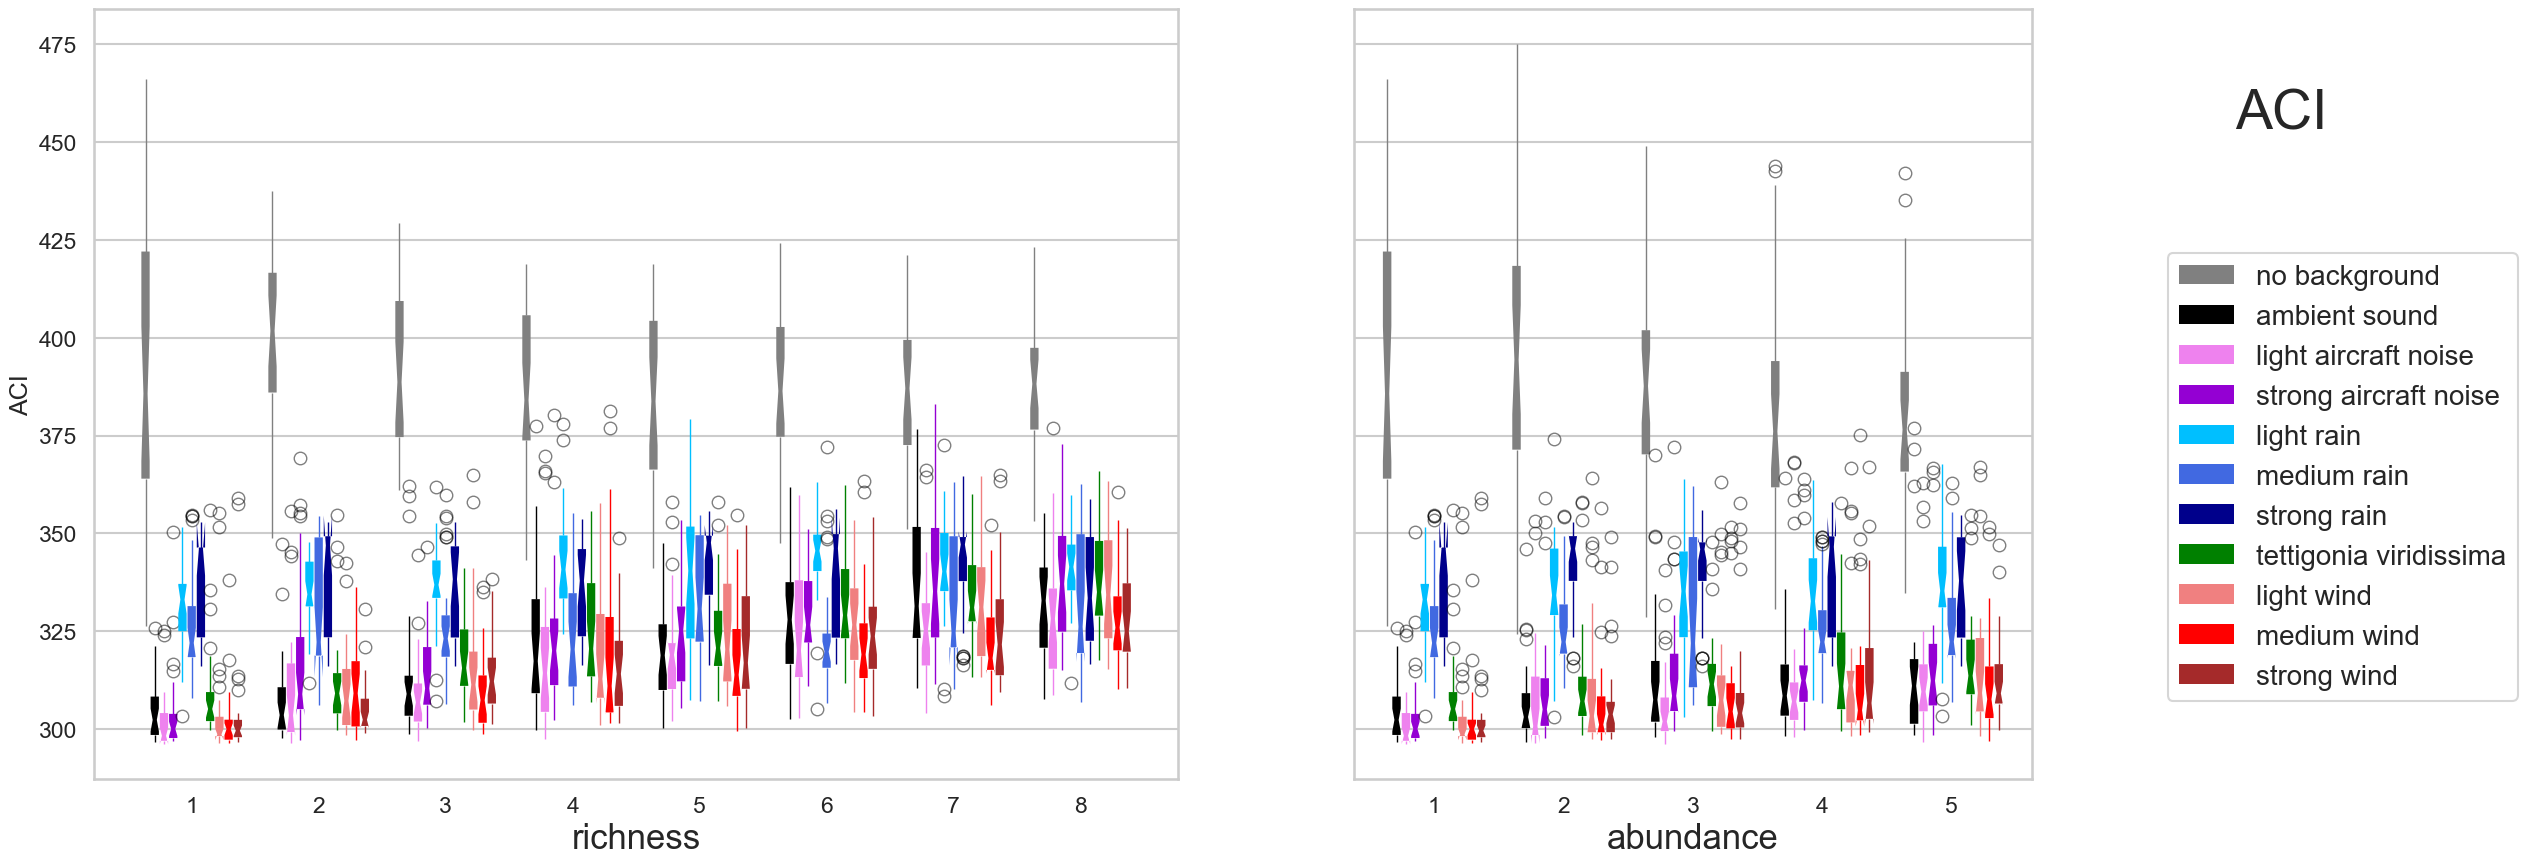

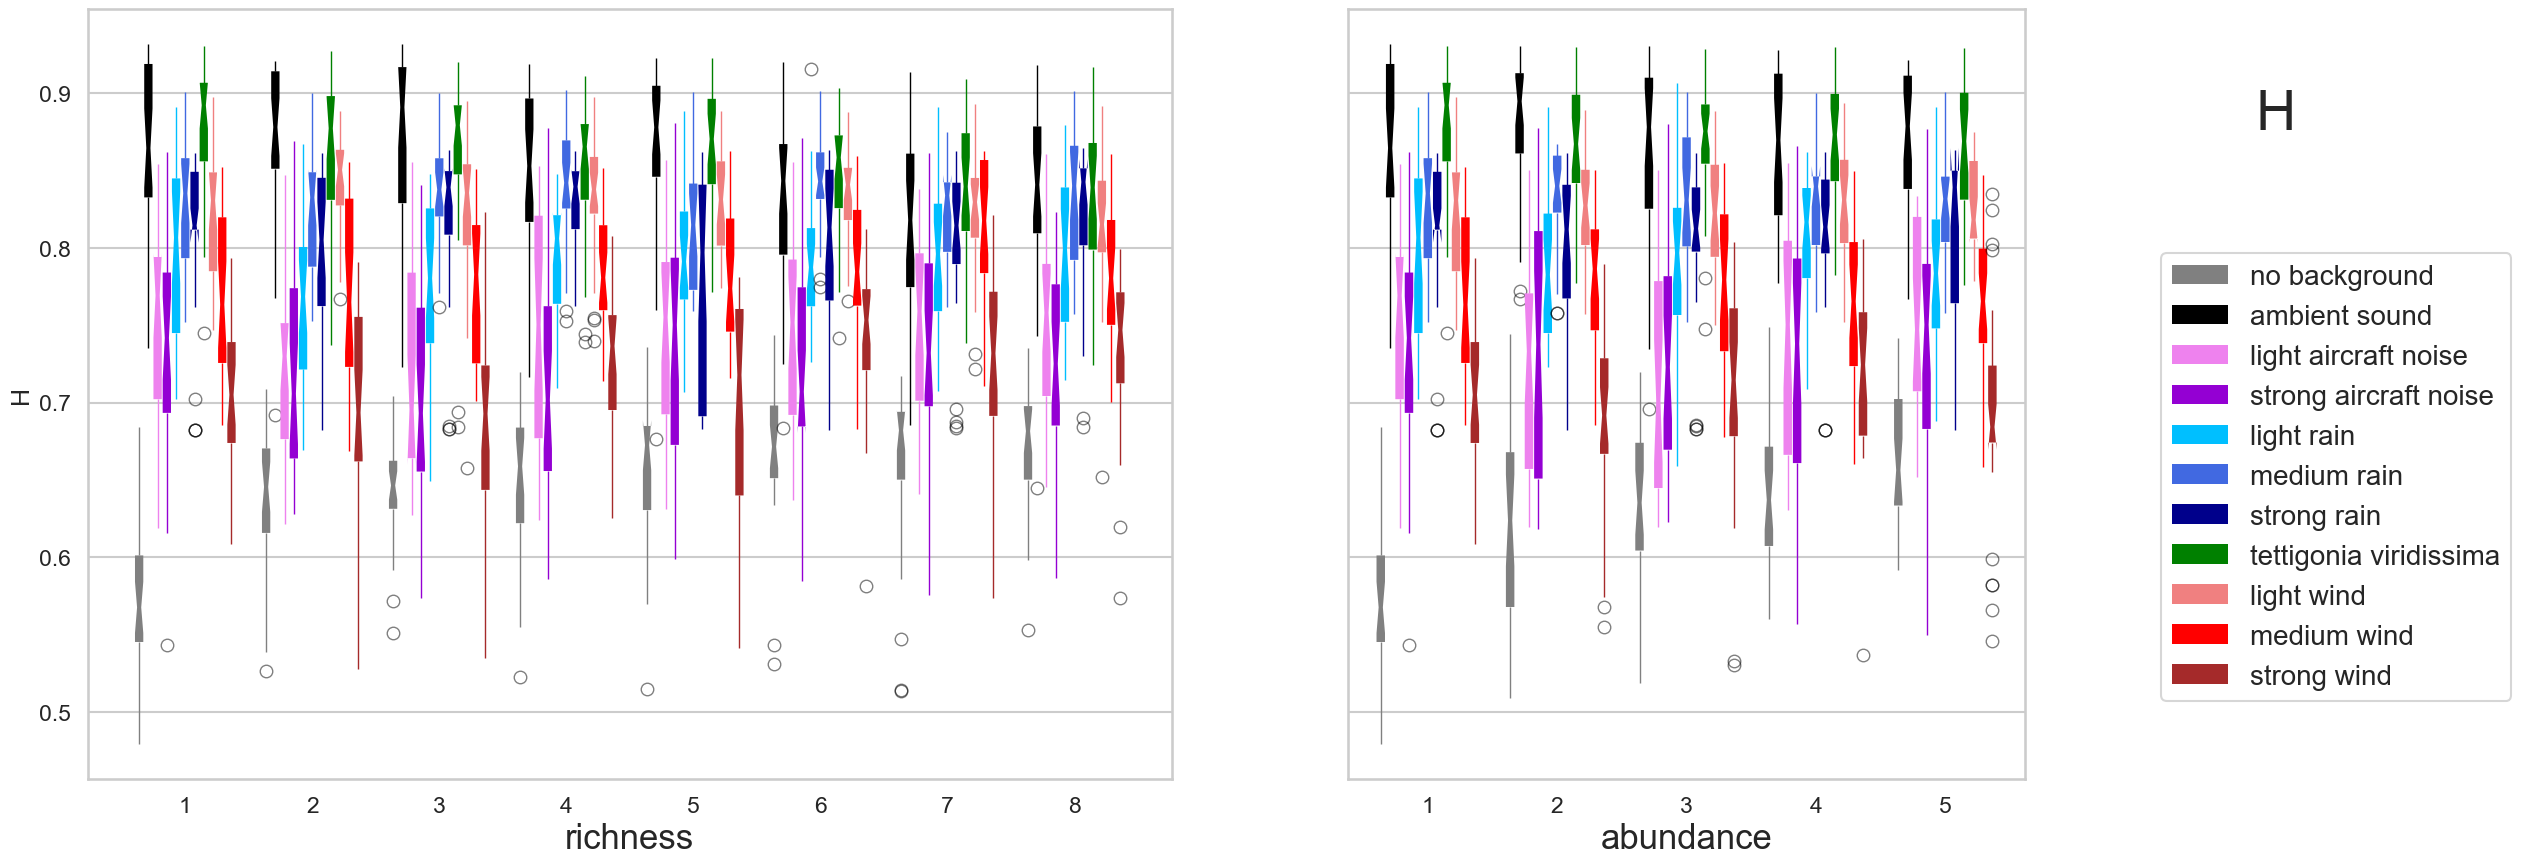

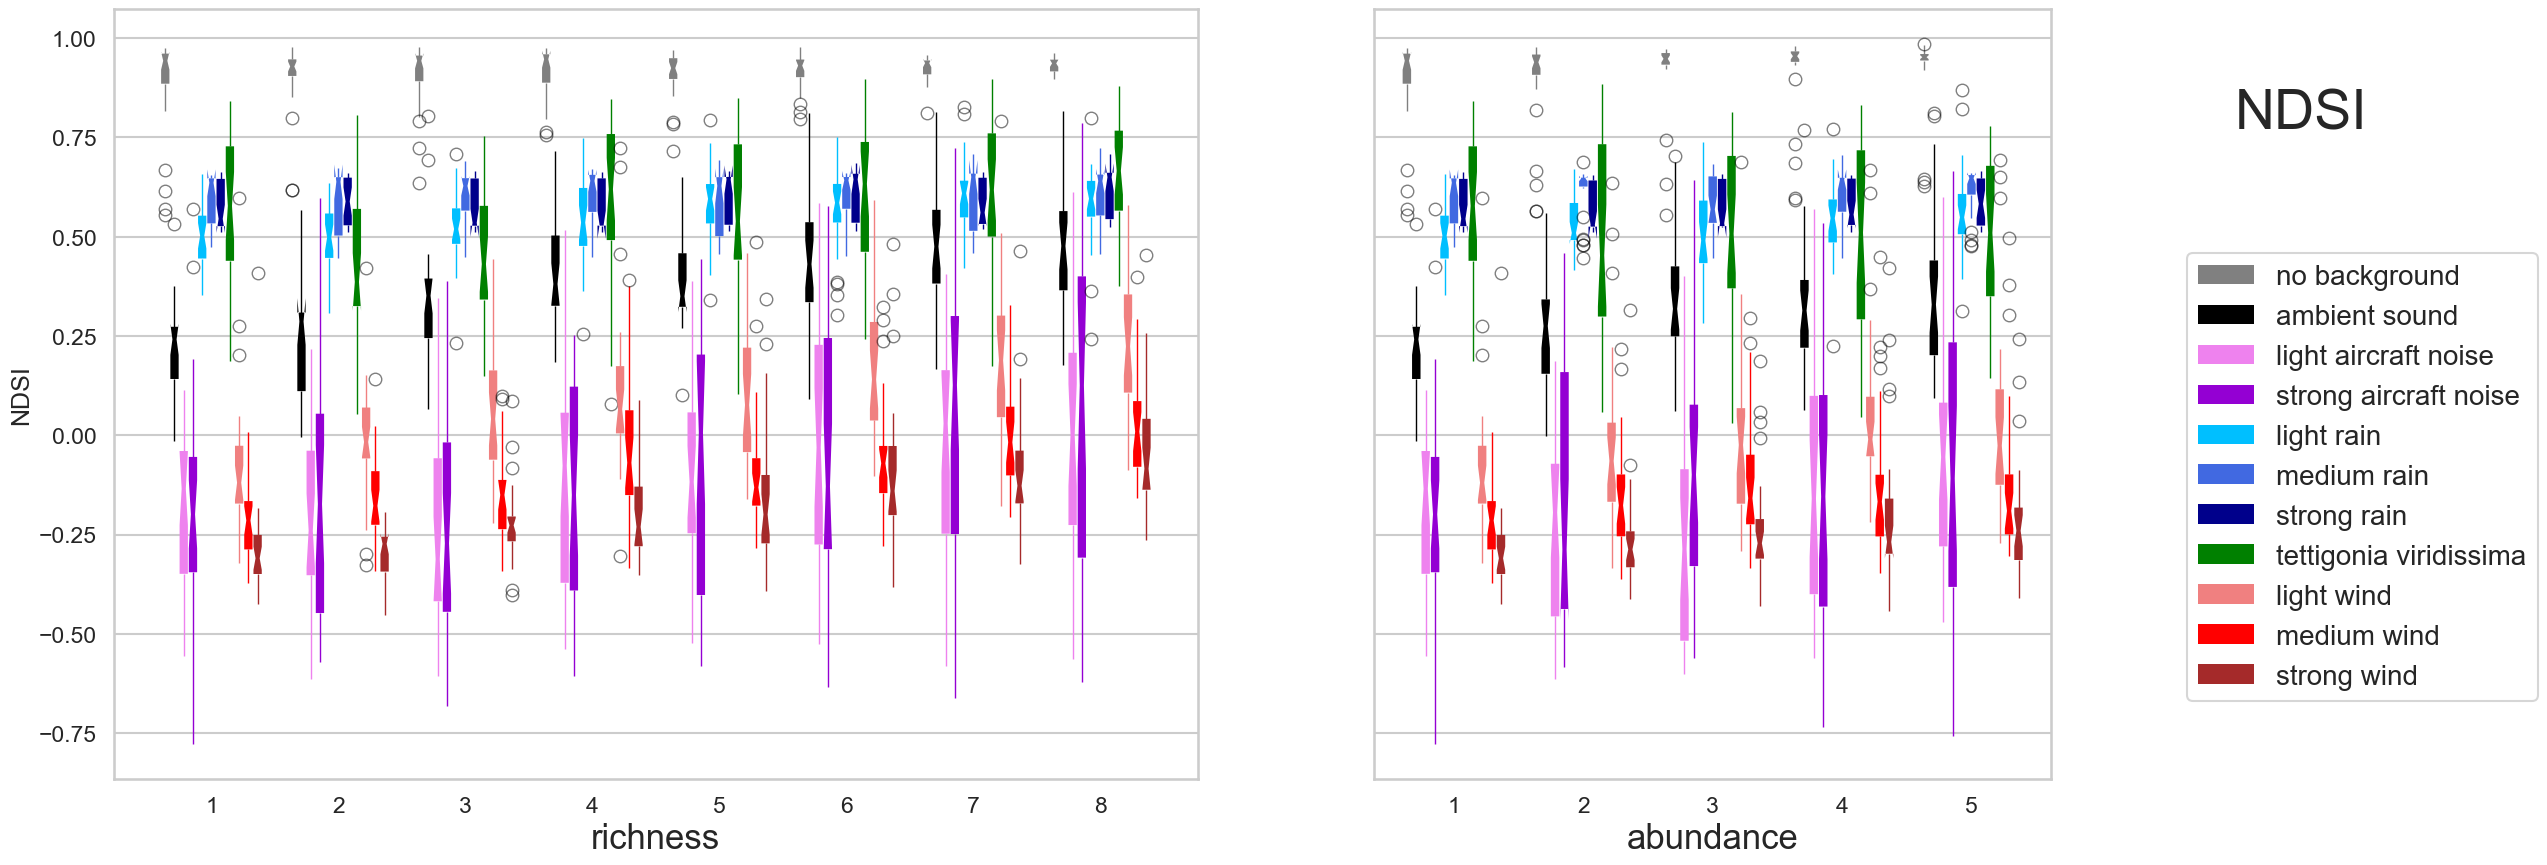

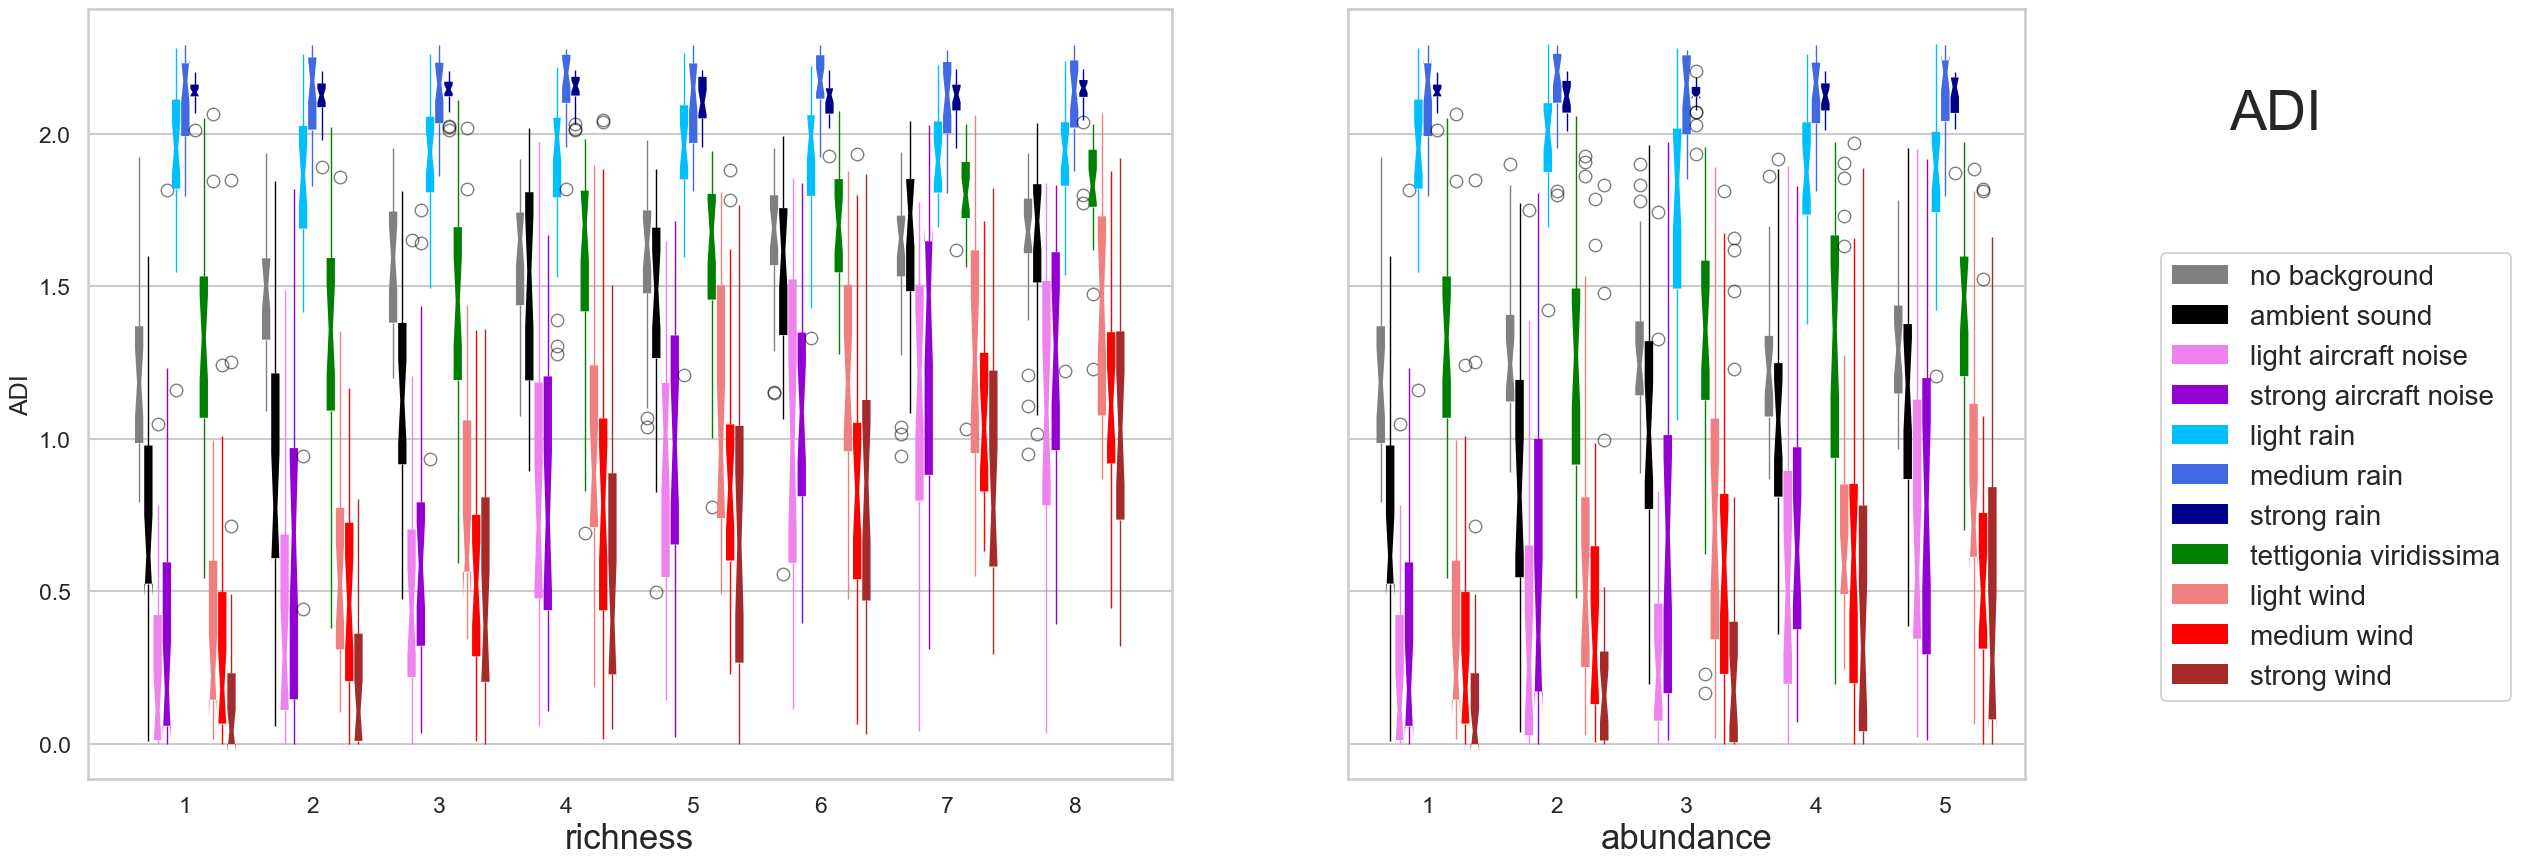

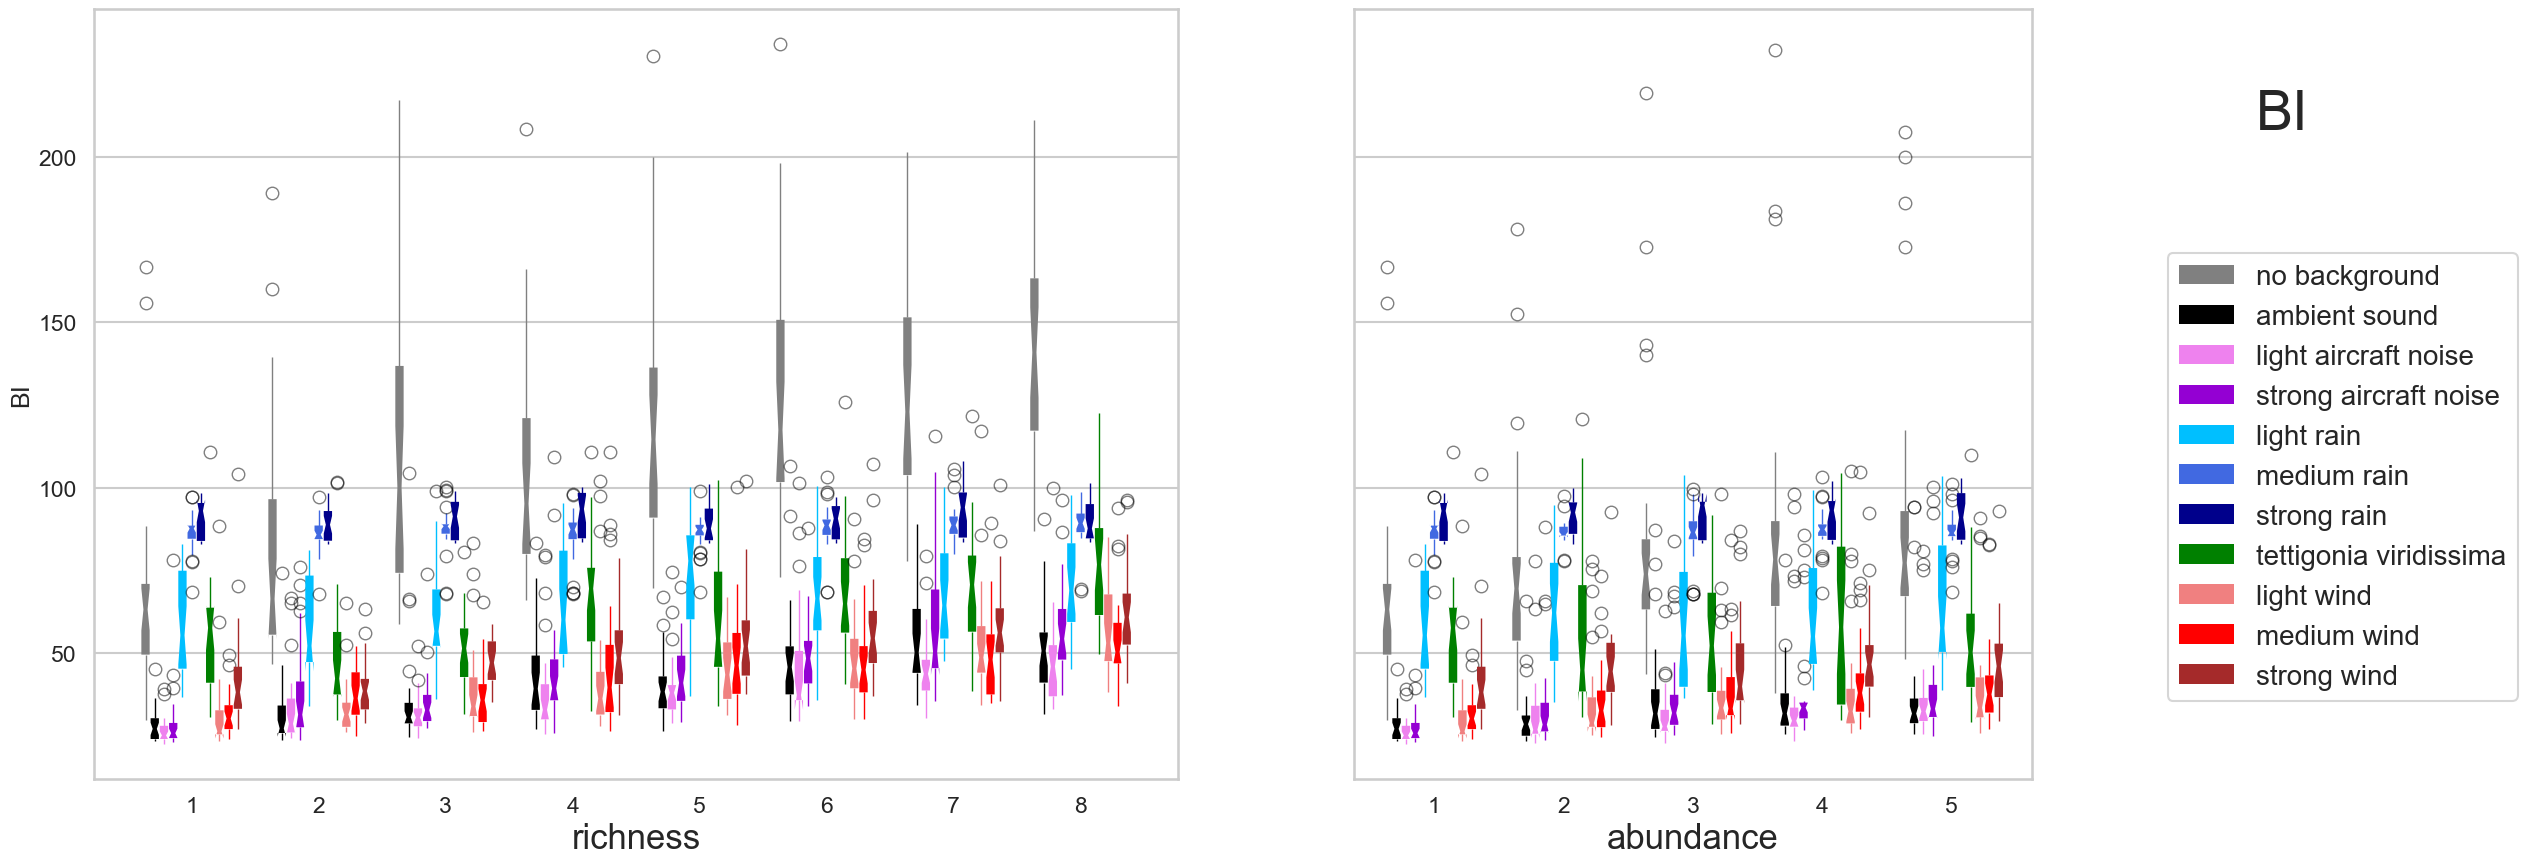

In [5]:
if PLOT_INDICES : 
    try :
        # test if database_df is already loaded
        if 'index_df' not in locals():
            index_df = pd.read_csv(DATABASE_DIR / INDICE_FILENAME, sep=';', index_col = 0)
    except :
        print('Indices not loaded. The indices file is missing or the path is incorrect')

    #Plot Dataframe
    for index in INDICES_LIST:
        fig = plot_indices(index_df, index)
        fig_path = DATABASE_DIR / f'Figures/{index}_fig.png'
        fig_path.parent.mkdir(exist_ok=True, parents=True)
        plt.savefig(fig_path)

nROI, abundance : ambient_sound p-value is not significant
nROI, abundance : rain_pw01 p-value is not significant
nROI, abundance : rain_pw02 correlation is weak
nROI, abundance : rain_pw02 p-value is not significant
nROI, abundance : rain_pw03 correlation is weak
nROI, abundance : rain_pw03 p-value is not significant
nROI, abundance : aircraft_pw01 p-value is not significant
aROI, abundance : ambient_sound p-value is not significant
aROI, abundance : rain_pw01 p-value is not significant
aROI, abundance : rain_pw02 correlation is weak
aROI, abundance : rain_pw02 p-value is not significant
aROI, abundance : rain_pw03 correlation is weak
aROI, abundance : rain_pw03 p-value is not significant
aROI, abundance : wind_pw01 p-value is not significant
aROI, abundance : wind_pw02 p-value is not significant
aROI, abundance : wind_pw03 p-value is not significant
aROI, abundance : aircraft_pw01 p-value is not significant
aROI, abundance : aircraft_pw02 p-value is not significant
aROI, abundance : 

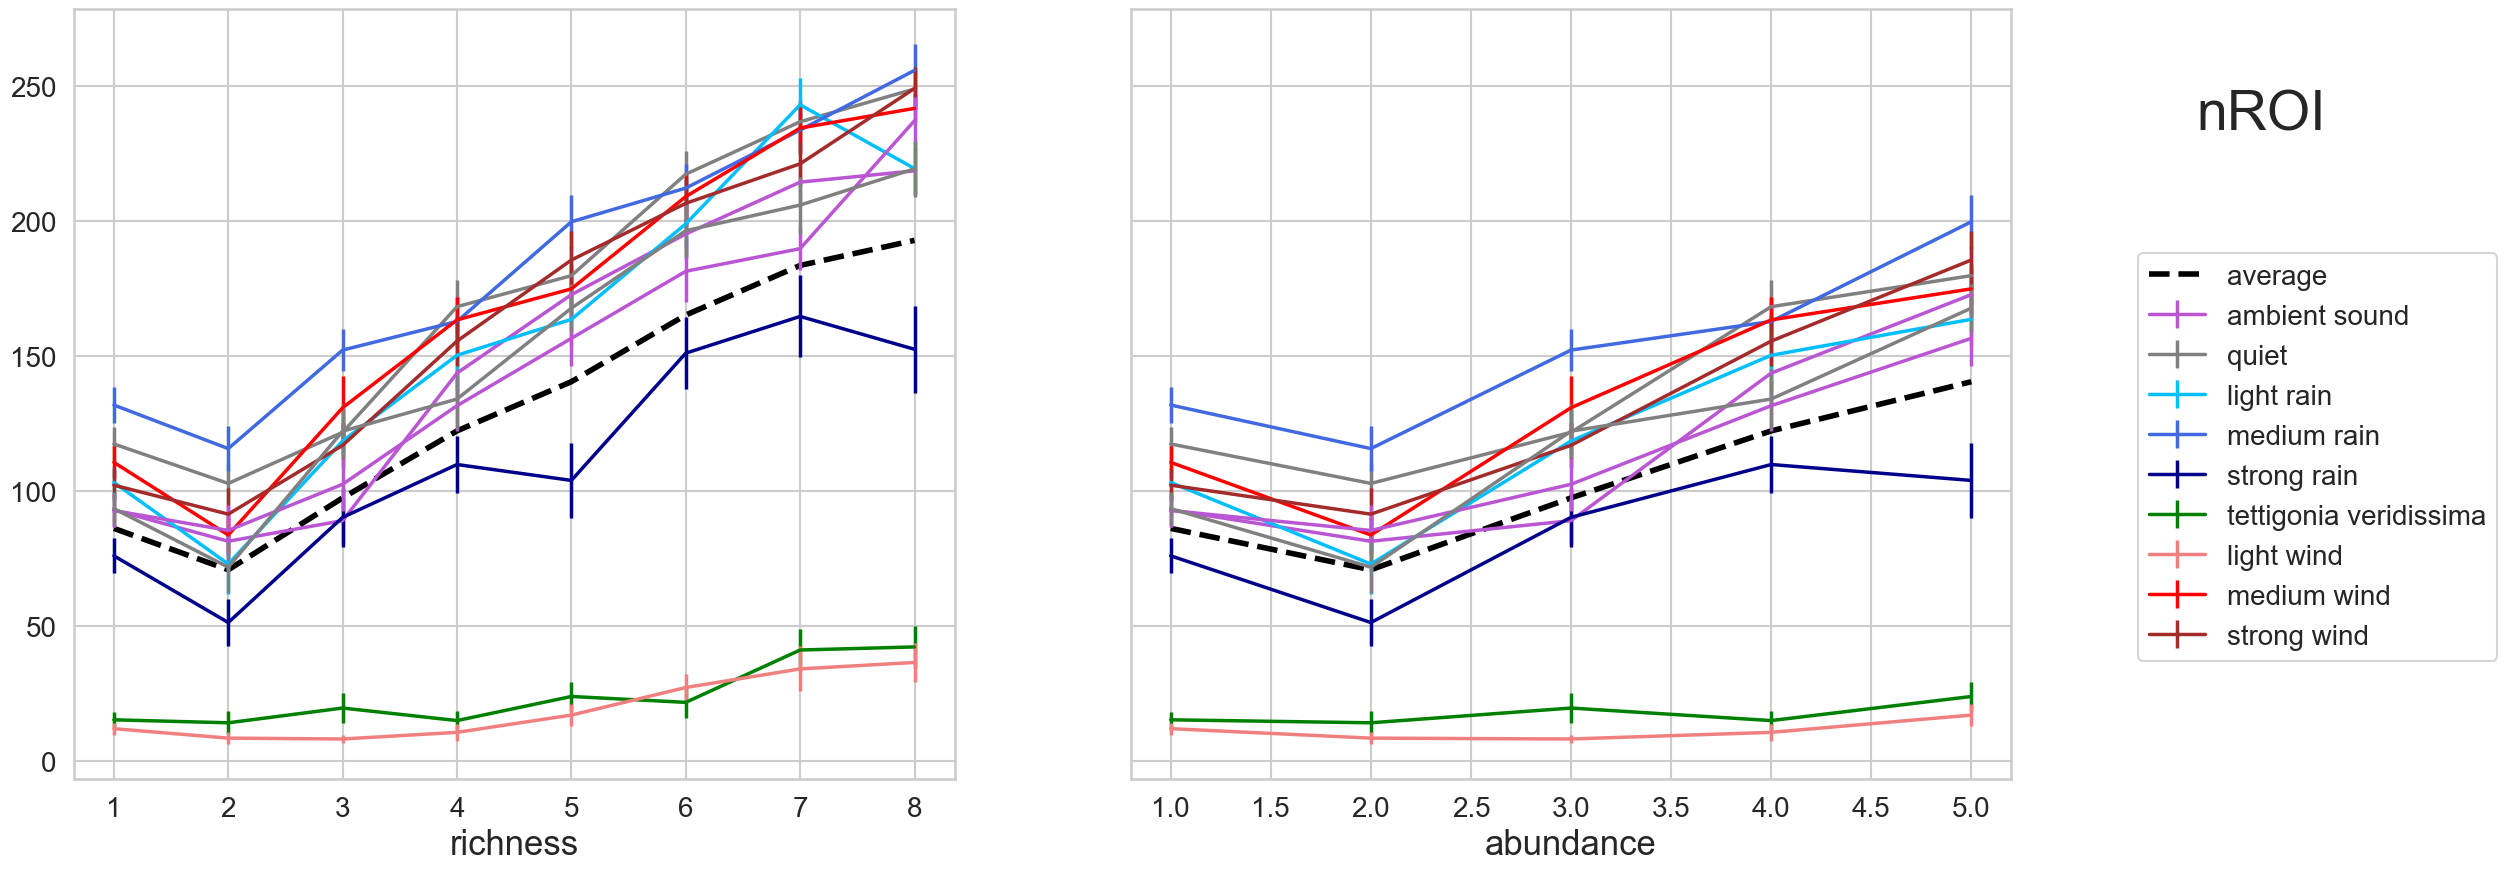

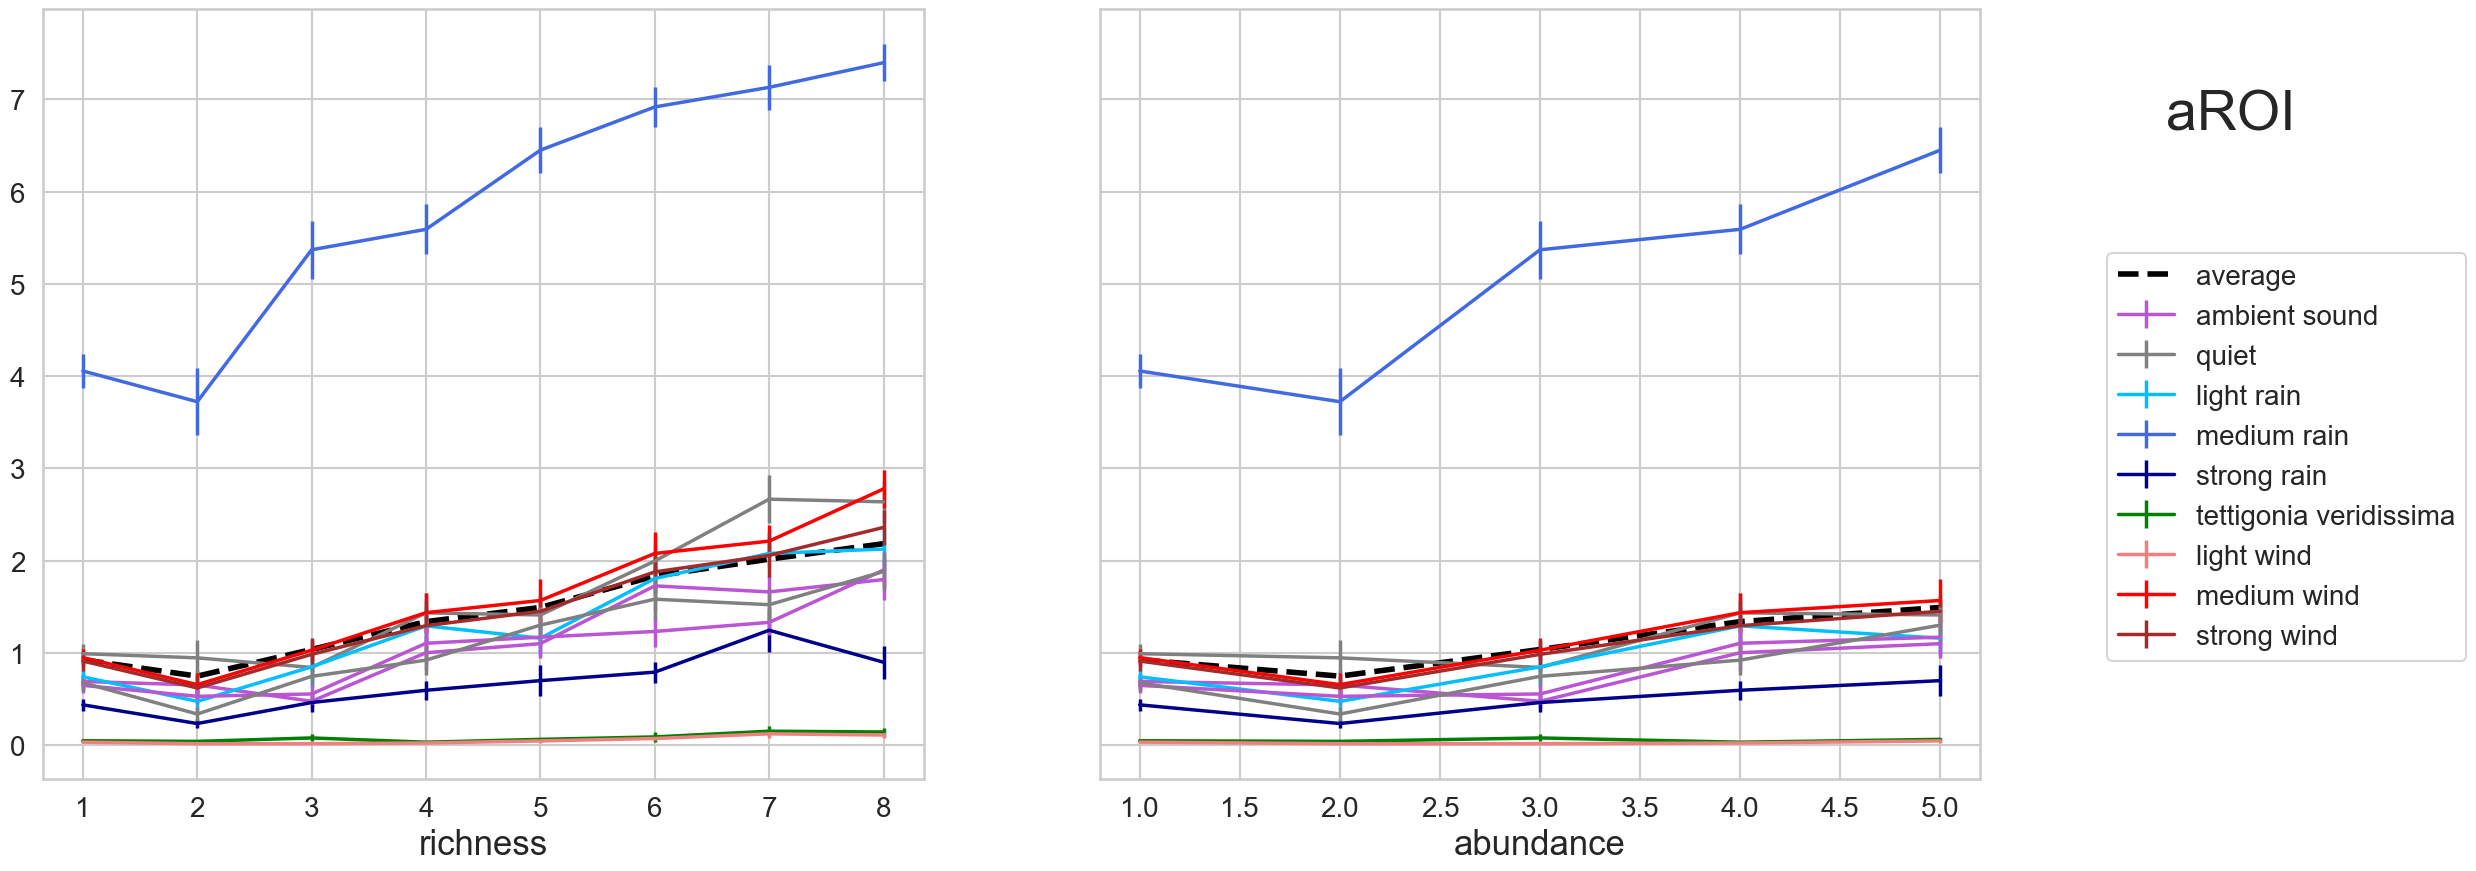

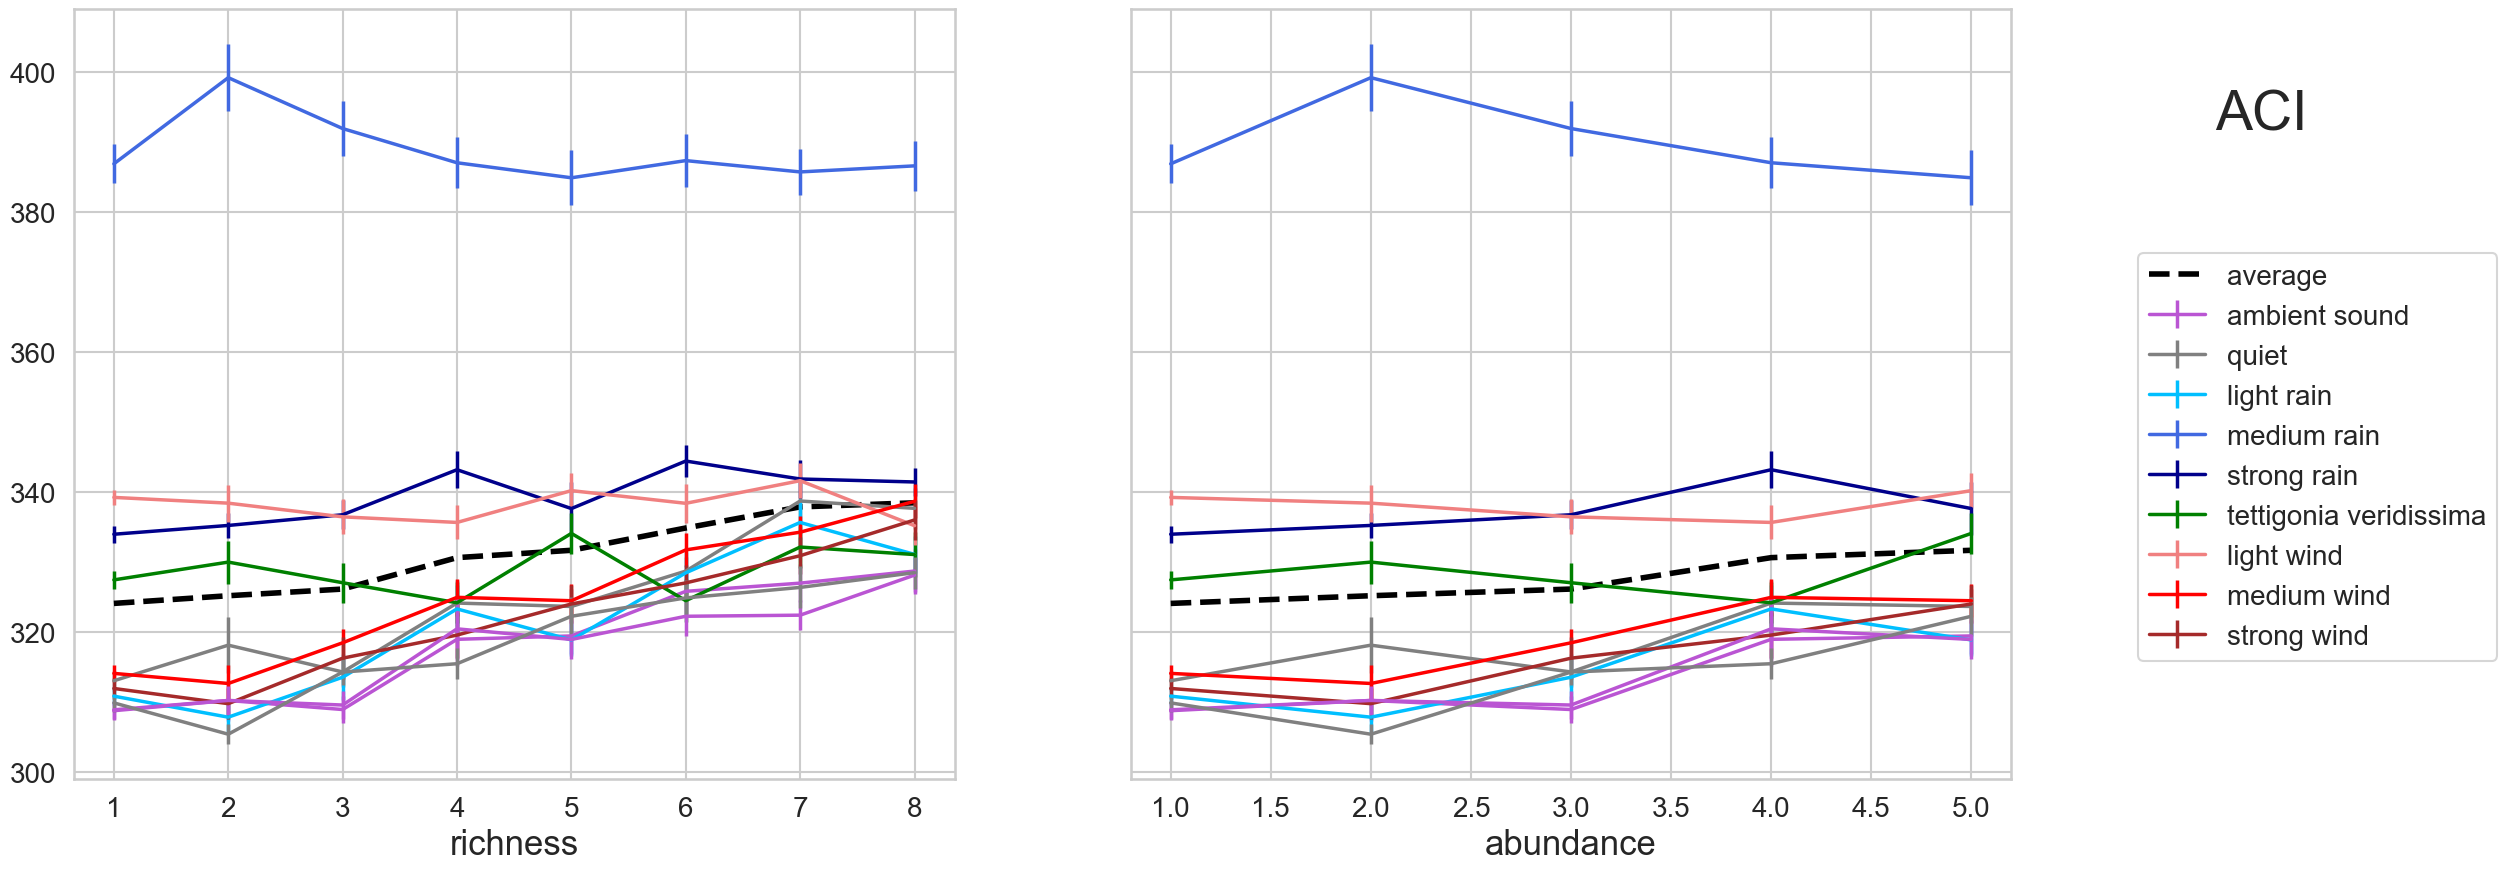

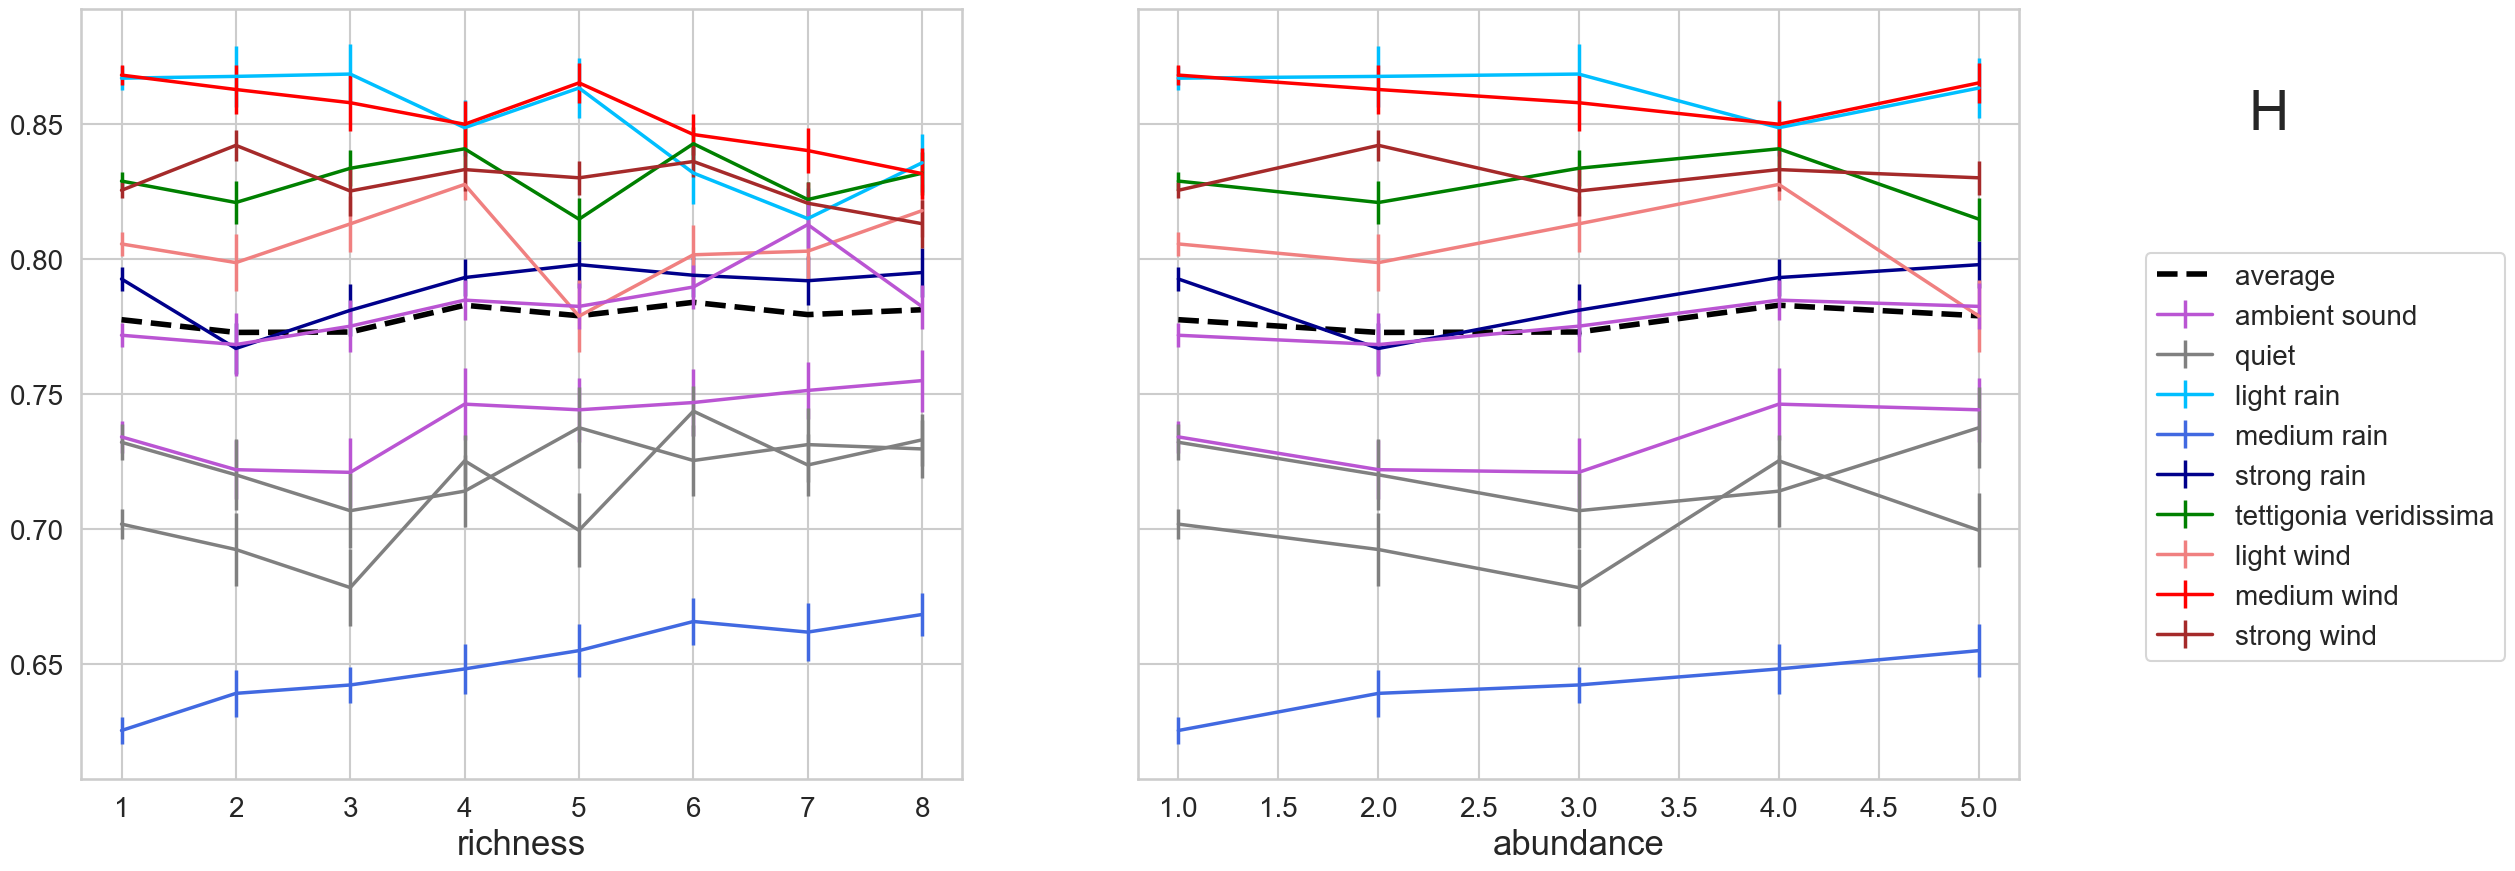

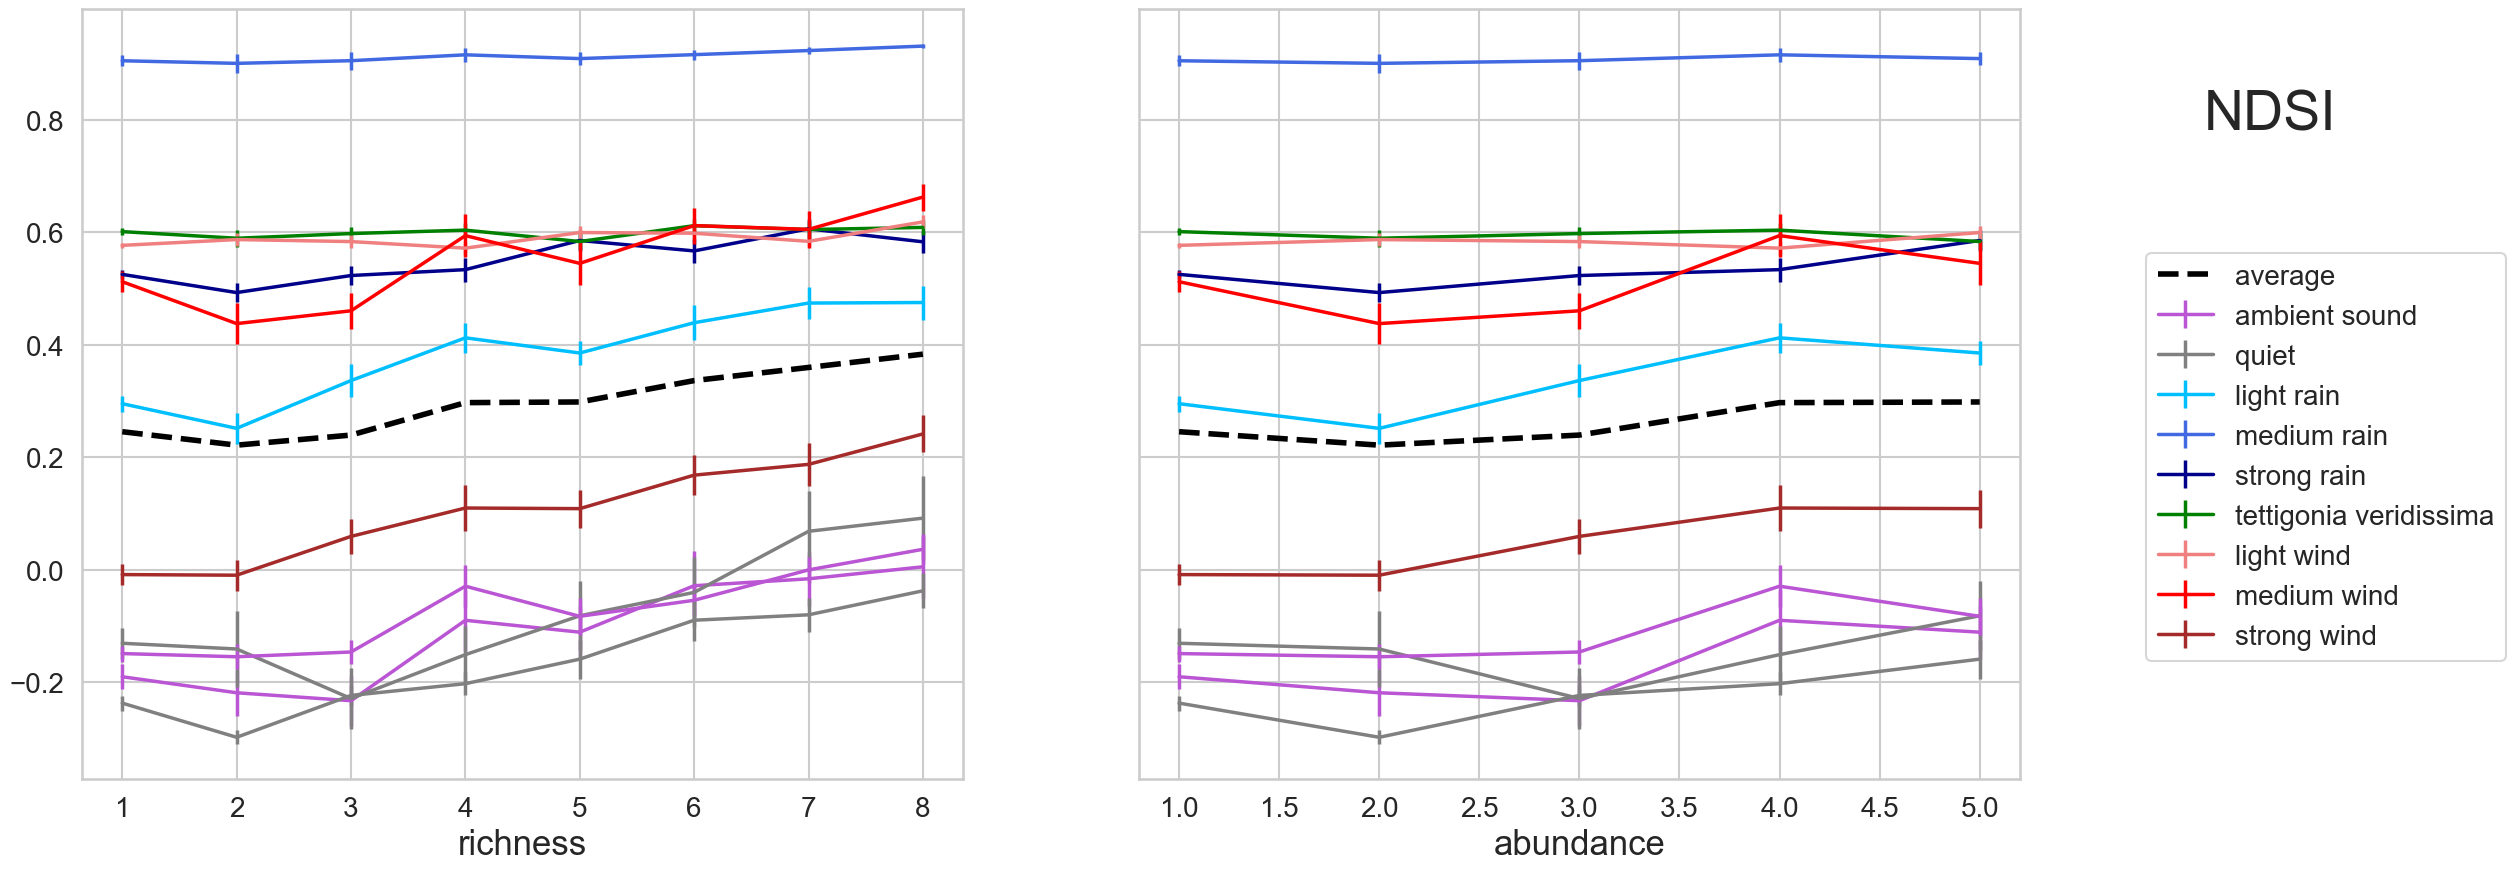

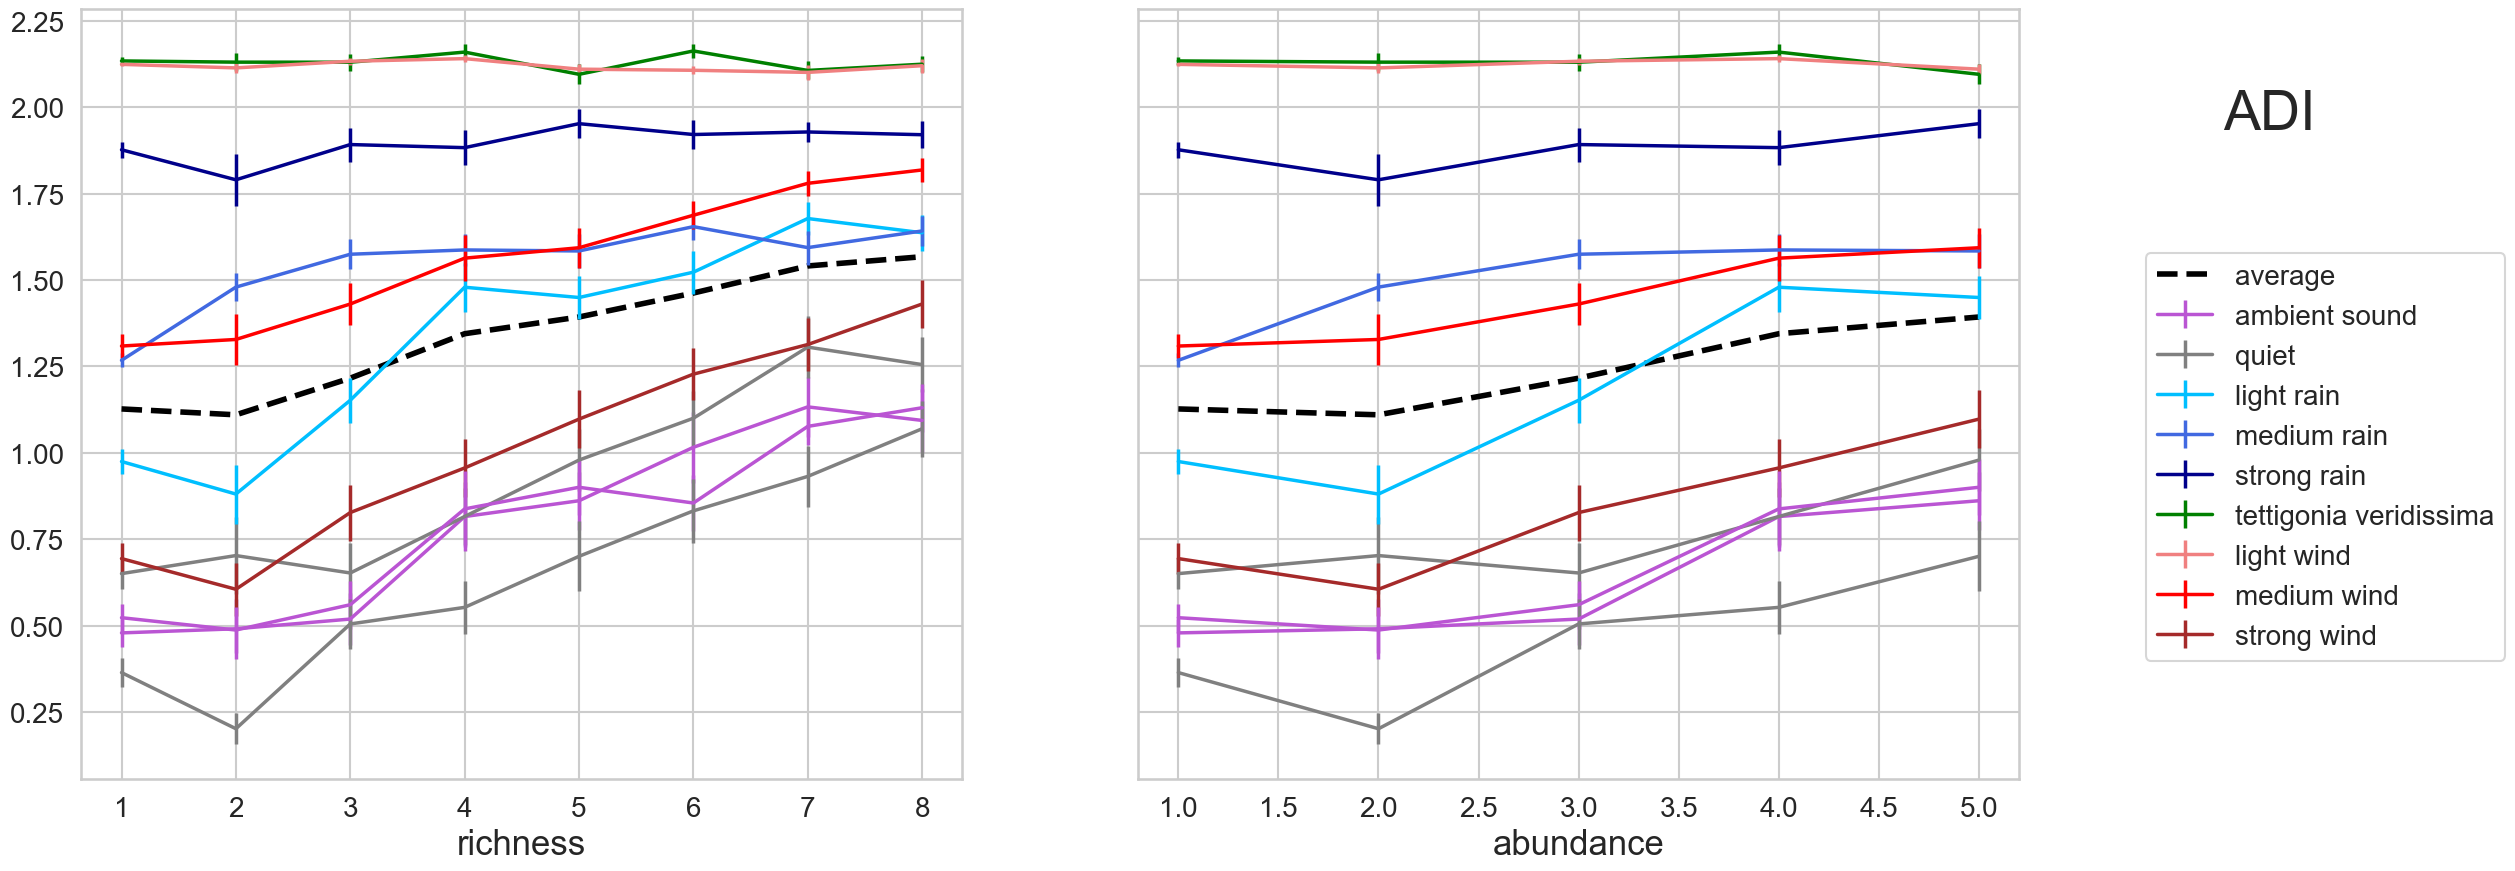

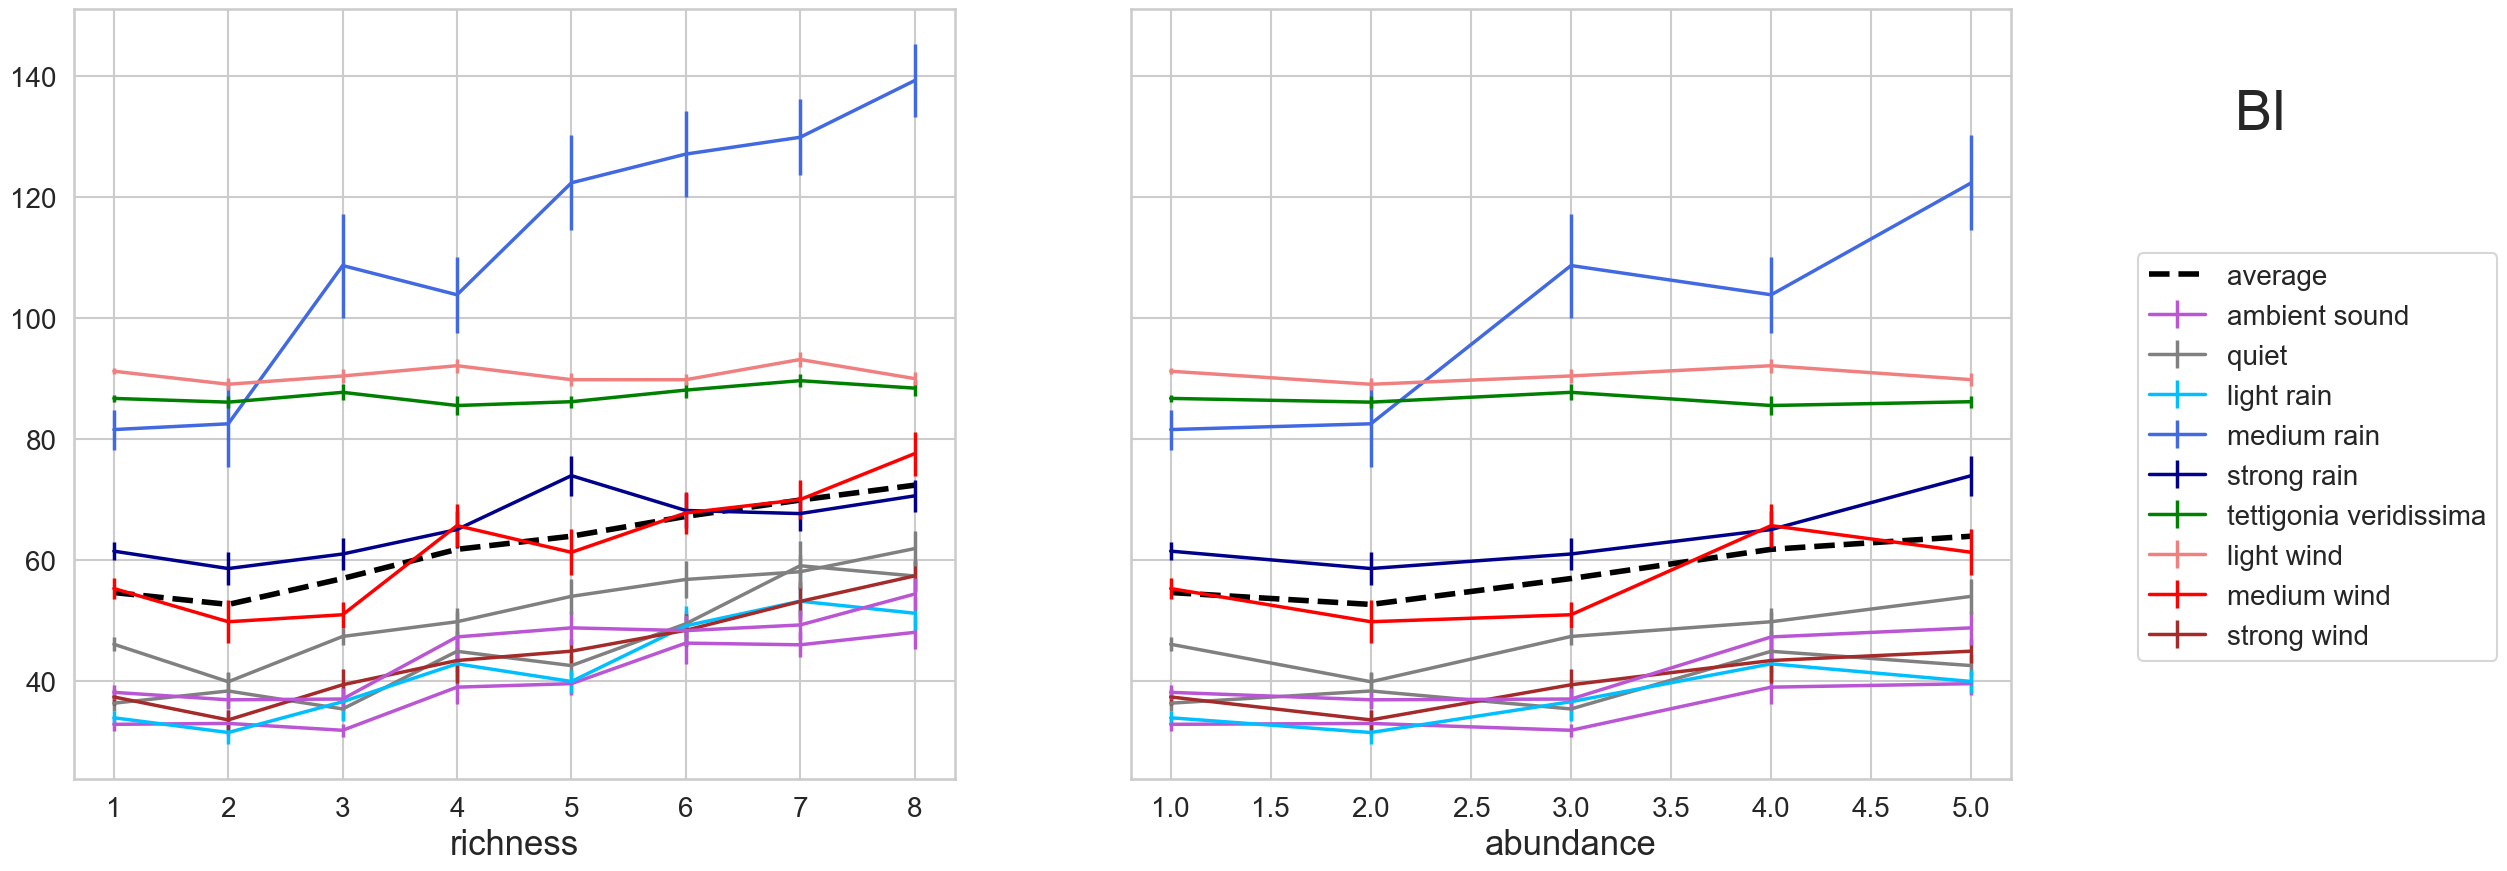

In [6]:
if PLOT_INDICES : 
    try :
        # test if database_df is already loaded
        if 'index_df' not in locals():
            index_df = pd.read_csv(DATABASE_DIR / INDICE_FILENAME, sep=';', index_col = 0)
    except :
        print('Indices not loaded. The indices file is missing or the path is incorrect')

    #Plot Dataframe
    for index in INDICES_LIST:
        fig = index_plot(index_df, index)
        fig_path = DATABASE_DIR / f'Figures/{index}_fig.png'
        fig_path.parent.mkdir(exist_ok=True, parents=True)
        plt.savefig(fig_path)